# Análise Principal 
- Dropout
- Avaliação Acadêmica

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

d1 = pd.read_csv("/Ciência de Dados Geral/Performance de Estudantes/student-performance-analysis/data/student-mat.csv", sep=";")
d2 = pd.read_csv("/Ciência de Dados Geral/Performance de Estudantes/student-performance-analysis/data/student-por.csv", sep=";")

d3 = pd.merge(d1, d2, on=["school", "sex", "age", "address", "famsize", "Pstatus",
                          "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"])

print(len(d3))

382


In [19]:
d3.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian_x', 'traveltime_x', 'studytime_x',
       'failures_x', 'schoolsup_x', 'famsup_x', 'paid_x', 'activities_x',
       'nursery', 'higher_x', 'internet', 'romantic_x', 'famrel_x',
       'freetime_x', 'goout_x', 'Dalc_x', 'Walc_x', 'health_x', 'absences_x',
       'G1_x', 'G2_x', 'G3_x', 'guardian_y', 'traveltime_y', 'studytime_y',
       'failures_y', 'schoolsup_y', 'famsup_y', 'paid_y', 'activities_y',
       'higher_y', 'romantic_y', 'famrel_y', 'freetime_y', 'goout_y', 'Dalc_y',
       'Walc_y', 'health_y', 'absences_y', 'G1_y', 'G2_y', 'G3_y', 'dropout_x',
       'dropout_y'],
      dtype='object')

## Dropout

In [15]:
d3['dropout_x'] = ((d3['G3_x'] == 0) & (d3['absences_x'] == 0)).astype(int)
d3.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y,G1_y,G2_y,G3_y,dropout_x
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,0


In [16]:
d3['dropout_y'] = ((d3['G3_y'] == 0) & (d3['absences_y'] == 0)).astype(int)
d3.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout_y,Dalc_y,Walc_y,health_y,absences_y,G1_y,G2_y,G3_y,dropout_x,dropout_y
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,4,0,11,11,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,2,9,11,11,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,6,12,13,12,0,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,0,14,14,14,0,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,0,11,13,13,0,0


## Alunos que passaram ou não:


In [22]:
# Transformando o target G3 em atributo categórico
# Definindo os limites para cada faixa
limite_insuficiente = 9
limite_regular = 14
limite_excelente = 20

def transform_note(valor):
    if valor <= limite_insuficiente:
        return 'insuficiente'
    elif valor <= limite_regular:
        return 'regular'
    elif valor <= limite_excelente:
        return 'excelente'

In [25]:
# Aplicando a função para transformar a coluna G3
d3['G3_transform_x'] = d3['G3_x'].apply(transform_note)
d3['G2_transform_x'] = d3['G2_x'].apply(transform_note)
d3['G1_transform_x'] = d3['G1_x'].apply(transform_note)

In [28]:
d3['G3_transform_x']

0      insuficiente
1      insuficiente
2           regular
3         excelente
4           regular
           ...     
377    insuficiente
378    insuficiente
379    insuficiente
380       excelente
381         regular
Name: G3_transform_x, Length: 382, dtype: object

In [29]:
d3['G3_transform_y'] = d3['G3_y'].apply(transform_note)
d3['G2_transform_y'] = d3['G2_y'].apply(transform_note)
d3['G1_transform_y'] = d3['G1_y'].apply(transform_note)

In [30]:
d3['G3_transform_y']

0           regular
1           regular
2           regular
3           regular
4           regular
           ...     
377       excelente
378    insuficiente
379    insuficiente
380         regular
381         regular
Name: G3_transform_y, Length: 382, dtype: object

In [ ]:
# Aqui estou definindo uma ordem hierárquica ao G3_transform. A ideia é que 
# ao chamar ele em uma operação, as categorias (baixo, mediano, alto, 
# excelente) apareçam de forma hierárquica
categorias_notes = ['insuficiente', 'regular', 'excelente']
ordem_notes = pd.api.types.CategoricalDtype(categories=categorias_notes, ordered=True)

d1_trabalhado_copy['G3_transform'] = d1_trabalhado_copy['G3_transform'].astype(ordem_notes)
d1_trabalhado_copy['G2_transform'] = d1_trabalhado_copy['G2_transform'].astype(ordem_notes)
d1_trabalhado_copy['G1_transform'] = d1_trabalhado_copy['G1_transform'].astype(ordem_notes)

In [32]:
grouped = d3.groupby(['G3_transform_x']).size()
print(grouped)

G3_transform_x
excelente        74
insuficiente    127
regular         181
dtype: int64


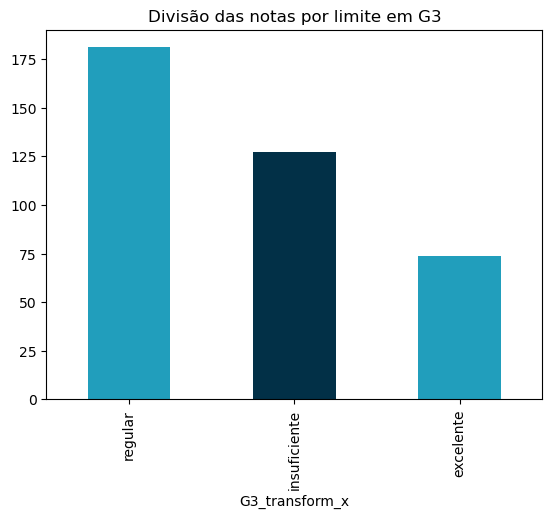

In [33]:
d3.G3_transform_x.value_counts().plot(kind='bar', title='Divisão das notas por limite em G3',color = ['#219ebc', '#023047']);